In [51]:
import numpy as np 
import matplotlib.pyplot as plt 

$c: [0,1] \rightarrow \mathbb{R}^2$

In [59]:
spacing1 = 1
spacing2 = .1

t1 = np.arange(0,1+spacing1,spacing1)
t2 = np.arange(0,1+spacing2,spacing2)

def c(t):
    c1 =  0*t
    c2 = 2*t - 1
    c = np.stack([c1, c2], axis=1)
    return c

c1 = c(t1)
c2 = c(t2)

$V:\mathbb{R}^2 \rightarrow \mathbb{R}^2$

In [60]:
def k(x):
    k = np.exp(-(1/(2))*np.linalg.norm(x)**2)
    return k

x = np.array([[0,-1], [0,0], [0,1]])
y = np.array([[0,-1], [1,0], [0,1]])


v = y - x
K = np.zeros([x.shape[0], x.shape[0]])

for i in range(K.shape[1]):
    for j in range(K.shape[1]):
        K[i,j] = k(x[i,:] - x[j,:])

P = np.dot(np.linalg.inv(K), v)

def V(xi):
    K = np.zeros((1, x.shape[0]))
    for j in range(K.shape[1]):
        K[:,j] = k(xi - x[j,:])

    vi = np.dot(K, P)
    return np.squeeze(vi)


In [61]:
xc,yc = np.meshgrid(np.linspace(-2,2,17),np.linspace(-1,1,9))

u = 0*xc
v = 0*xc
for i in range(u.shape[0]):
    for j in range(u.shape[1]):
        vi = V(np.array([xc[i,j], yc[i,j]]))
        u[i,j] = vi[0]
        v[i,j] = vi[1]


$V(c(t))$

In [62]:
Vc1 = 0*c1

for i, ct in enumerate(c1):
    Vc1[i,:] = ct + V(ct)

Vc2 = 0*c2

for i, ct in enumerate(c2):
    Vc2[i,:] = ct + V(ct)

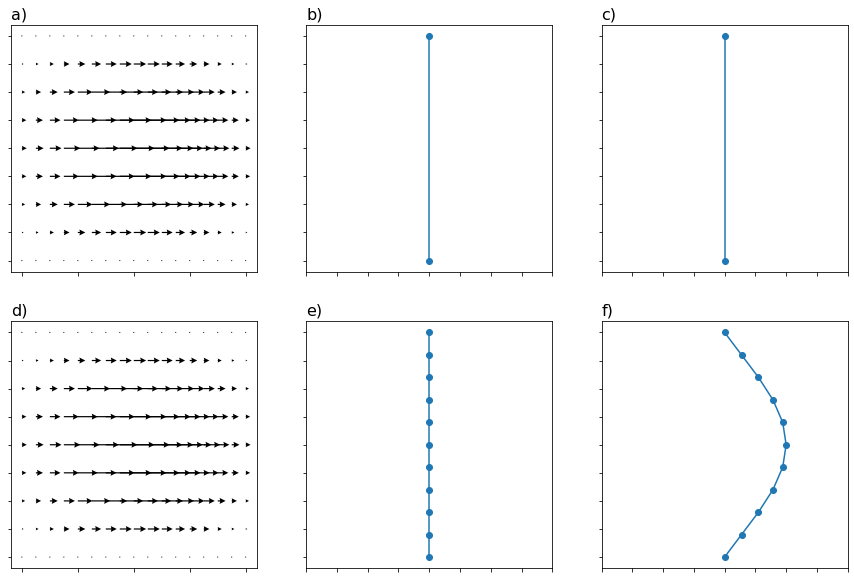

In [79]:
f, axs = plt.subplots(2,3, sharey=True)

headwidth=5
fontdict = {"fontsize": 16}

ax = axs[0,0]
ax.quiver(xc,yc,u,v, headwidth=headwidth)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_title('a)', loc='left', fontdict = fontdict)


ax = axs[0,1]
ax.scatter(c1[:,0], c1[:,1])
ax.plot(c1[:,0], c1[:,1])
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim([-2,2])
ax.set_title('b)', loc='left', fontdict = fontdict)


ax = axs[0,2]
ax.scatter(Vc1[:,0], Vc1[:,1])
ax.plot(Vc1[:,0], Vc1[:,1])
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim([-2,2])
ax.set_title('c)', loc='left', fontdict = fontdict)

ax = axs[1,0]
ax.quiver(xc,yc,u,v, headwidth=headwidth)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_title('d)', loc='left', fontdict = fontdict)


ax = axs[1,1]
ax.scatter(c2[:,0], c2[:,1])
ax.plot(c2[:,0], c2[:,1])
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim([-2,2])
ax.set_title('e)', loc='left', fontdict = fontdict)


ax = axs[1,2]
ax.scatter(Vc2[:,0], Vc2[:,1])
ax.plot(Vc2[:,0], Vc2[:,1])
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim([-2,2])
ax.set_title('f)', loc='left', fontdict = fontdict)

f.set_figheight(10)
f.set_figwidth(15)
